In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_result(experiment):
    return pd.read_csv(f'../results/{experiment}_experiment.csv')

In [4]:
experiments = ('baseline', 'blind', 'augment', 'CLP1nt', 'CLP005', 'CLP1', 'CLP5')
dfs = [get_result(e) for e in experiments]

In [5]:
tab_1_results = []
tab_1_cols = ['ctf_cc_train', 'ctf_synth_toxic', 'ctf_synth_nontoxic']
for e, df  in zip(experiments, dfs):
    row = [e] + list(df.mean()[tab_1_cols])
    tab_1_results.append(row)
df_tab_1 = pd.DataFrame(tab_1_results, columns=['experiment'] + tab_1_cols)

In [6]:
df_tab_1

,experiment,ctf_cc_train,ctf_synth_toxic,ctf_synth_nontoxic
0,baseline,5.419064e-02,1.046607e-01,1.993427e-01
1,blind,4.856295e-02,8.704228e-02,1.200758e-01
2,augment,2.476759e-02,5.000238e-02,2.641072e-02
3,CLP1nt,2.114578e-02,3.630375e-02,2.344671e-02
4,CLP005,1.450406e-02,8.482378e-02,1.159226e-01
5,CLP1,6.299064e-04,4.203872e-04,3.636517e-04
6,CLP5,2.265881e-07,8.822763e-08,9.684341e-08


In [7]:
tab_2_results = []
tab_2_cols = ['ctf_cc_eval']
for e, df  in zip(experiments, dfs):
    row = [e] + list(df.mean()[tab_2_cols])
    tab_2_results.append(row)
df_tab_2 = pd.DataFrame(tab_2_results, columns=['experiment'] + tab_2_cols)

In [8]:
df_tab_2

,experiment,ctf_cc_eval
0,baseline,1.583810e-01
1,blind,1.338806e-01
2,augment,4.720663e-02
3,CLP1nt,2.898559e-02
4,CLP005,1.003503e-01
5,CLP1,7.957457e-04
6,CLP5,8.569225e-08


In [9]:
fig_1_TNR = {}
fig_1_TPR = {}
fig_1_CTF = {}
fig_1_res = ['cci_tn', 'cci_tp', 'ctf_cc_train']

for e, df  in zip(experiments, dfs):
    res = list(df.mean()[fig_1_res])
    fig_1_TNR[e] = res[0]
    fig_1_TPR[e] = res[1]
    fig_1_CTF[e] = res[2]

Text(0.5, 1.0, 'TNR')

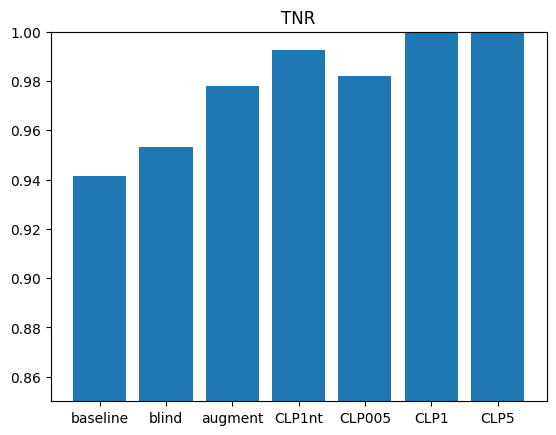

In [10]:
plt.bar(fig_1_TNR.keys(),fig_1_TNR.values())
plt.ylim(0.85,1)
plt.title('TNR')

Text(0.5, 1.0, 'TPR')

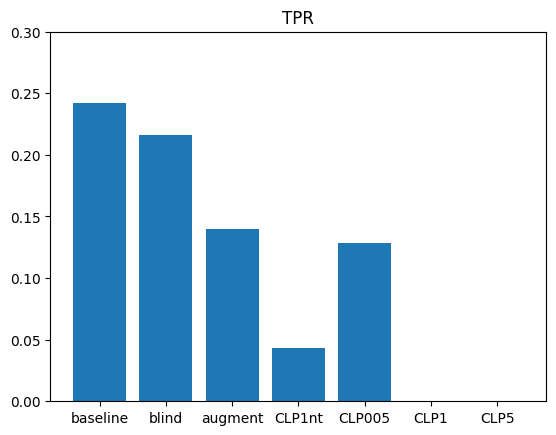

In [11]:
plt.bar(fig_1_TPR.keys(),fig_1_TPR.values())
plt.ylim(0.0,0.3)
plt.title('TPR')

Text(0.5, 1.0, 'CTF')

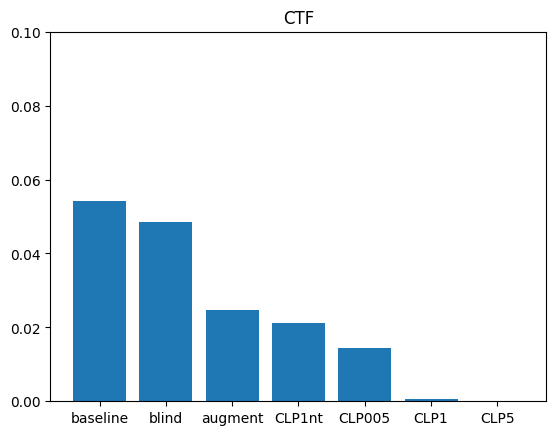

In [12]:
plt.bar(fig_1_CTF.keys(),fig_1_CTF.values())
plt.ylim(0.0,0.1)
plt.title('CTF')